### NivLink Demo: Multiple Screens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as io
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from nivlink import ScreenInfo
from nivlink import epoching_fht, align_to_aoi, compute_fixations

sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

#### Load eye-tracking data.

In [2]:
## Load single subject data from text file.
et_data_path = 'sample_eyetrack_data.txt'
raw_data = pd.read_table(et_data_path);

## Filter out columns of interest, convert to array and replace '.' with NaNs.
raw_data_lean = raw_data.filter(['SAMPLE_MESSAGE','RIGHT_GAZE_X','RIGHT_GAZE_Y'], axis=1)
raw_data_lean = raw_data_lean.replace('.',np.nan)
raw_data_array = raw_data_lean.values

#### Load behavioral data.

In [3]:
behavior = read_csv('sample_behav_data.csv',index_col=0)

#### Load pre-generated events file.

In [4]:
events_file_path = 'sample_events.mat'
events_mat = io.loadmat(events_file_path)
events = np.array(events_mat["events_array"])

#### Load pre-generated feature map file.

In [5]:
featmap_file_path = 'sample_featmap.mat'
featmap_mat = io.loadmat(featmap_file_path)
featmap = np.array(featmap_mat["features_aoi_map"])

#### Multiple screens with non-overlapping AoIs.

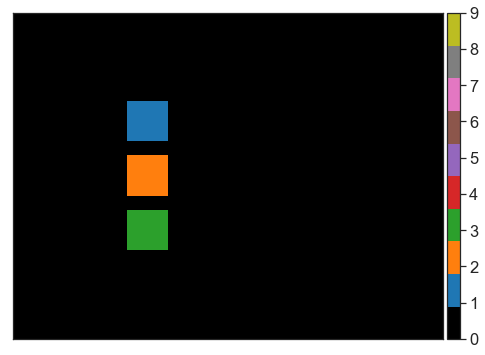

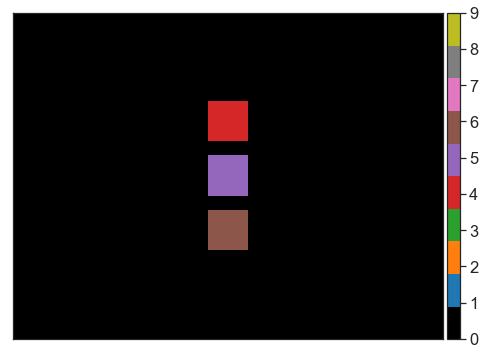

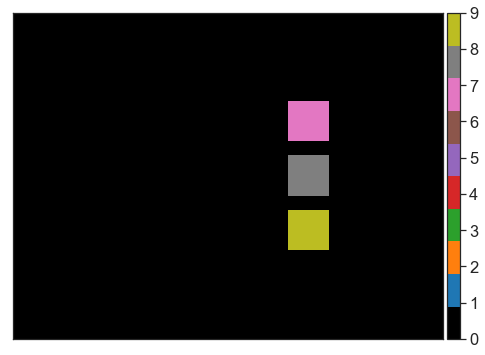

In [7]:
## Define metadata.
xdim, ydim, sfreq, n_screens = 1600, 1200, 500, 3 

## Initialize ScreenInfo object.
info = ScreenInfo(xdim, ydim, sfreq, n_screens)

## Define and add AoIs.
n_aois = 9
aois = np.empty((n_aois,2,2))

# Left column
aois[0] = np.matrix([[425, 325], [575, 475]])
aois[1] = np.matrix([[425, 525], [575, 675]])
aois[2] = np.matrix([[425, 725], [575, 875]])

# Middle column
aois[3] = np.matrix([[725, 325], [875, 475]])
aois[4] = np.matrix([[725, 525], [875, 675]])
aois[5] = np.matrix([[725, 725], [875, 875]])

# Right column
aois[6] = np.matrix([[1025, 325], [1175, 475]])
aois[7] = np.matrix([[1025, 525], [1175, 675]])
aois[8] = np.matrix([[1025, 725], [1175, 875]])

# Loop over AoIs and add to ScreenInfo object. 
for a in range(0, n_aois):
    
    # Determine which screen to add AoI to. 
    if (a+1) < 4: sid = 1
    elif ((a+1) > 3) & ((a+1) <= 6): sid = 2
    elif (a+1) > 6: sid = 3
        
    info.add_rectangle_aoi(aois[a,0,0], aois[a,1,0], aois[a,0,1], aois[a,1,1], sid)    

## Visually inspect AoIs. 
fig, ax = info.plot_aoi(1,6)
fig, ax = info.plot_aoi(2,6)
fig, ax = info.plot_aoi(3,6)
